In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the file
df = pd.read_csv(r"C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\UScomments.csv" , on_bad_lines = 'skip')
df.head()

C:\Users\khaph\AppData\Local\Temp\ipykernel_7504\540761476.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\UScomments.csv" , on_bad_lines = 'skip')


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [3]:
#to check how many rows having null value
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [4]:
#to remove those null value off the dataframe
df.dropna(inplace=True)

In [5]:
#to check if the dropna work
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [6]:
!pip install textblob

In [7]:
#testing the library
from textblob import TextBlob
TextBlob("you did it good, i like it").sentiment.polarity

0.7

In [8]:
polarity = []
for i in df['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
    
df['polarity'] = polarity
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [9]:
df.tail()

,video_id,comment_text,likes,replies,polarity
691395,EoejGgUNmVU,Лучшая,1,0,0.0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0,0.0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0,0.0
691398,EoejGgUNmVU,Islığı yeter...,0,0,0.0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0,0.0


In [10]:
df[df['polarity']==-1].head()


,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [11]:
#install wordcloud
!pip install wordcloud

In [12]:
#STOPWORDS to find word with no meaning
from wordcloud import WordCloud, STOPWORDS

In [13]:
#list out list of word with no meaning
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [14]:
#create a string of positive words which will then be used as parameter for the wordcloud generate function
positive_words = " ".join(df[df['polarity']==1]['comment_text'])
type(positive_words)

str

In [15]:
#generate wordcloud with positive words
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(positive_words)

(-0.5, 399.5, 199.5, -0.5)

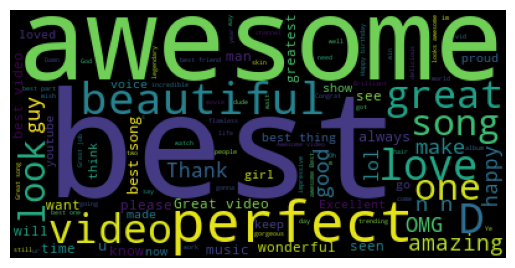

In [16]:
#using platplotlib to draw the wordcloud
plt.imshow(wordcloud)
plt.axis('off')


In [17]:
#create string for negative words
negative_words = " ".join(df[df['polarity']==-1]['comment_text'])
type(negative_words)

str

In [18]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(negative_words)


(-0.5, 399.5, 199.5, -0.5)

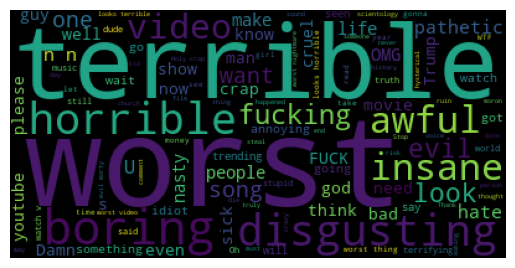

In [19]:
plt.imshow(wordcloud2)
plt.axis('off')

In [62]:
!pip install emoji==2.10.1

  Obtaining dependency information for emoji==2.10.1 from https://files.pythonhosted.org/packages/98/00/00d56e704d69cee4a92b1d517676579b4af5f2f8bc72946c464a504705b2/emoji-2.10.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/421.5 kB ? eta -:--:--
   -- ------------------------------------- 30.7/421.5 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  419.8/421.5 kB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 421.5/421.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: emoji
    Found existing installation: emoji 2.2.0
    Uninstalling emoji-2.2.0:
      Successfully uninstalled emoji-2.2.0


In [117]:
#the comment_text was returned as tuple, therefore tolist() was used to convert data to list
import emoji
emoji_list = []
for comment in df['comment_text'].dropna().tolist():
    for i in comment:
        if i in emoji.EMOJI_DATA:
            emoji_list.append(i)

In [118]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [120]:
from collections import Counter
# Use Counter
result = Counter(emoji_list).most_common(10)


In [121]:
#create list of the most 10 common emoji, and the count of them
emojis = []
counts = []
for i in range(10):
    emojis.append(result[i][0])
    counts.append(result[i][1])
print(emojis,counts)

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕'] [36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]


In [122]:
import plotly.graph_objs as go
from plotly.offline import iplot


In [123]:
#bar chart showing the most 10 common emoji used on youtube 
chart = go.Bar(x=emojis, y=counts)
iplot([chart])

In [125]:
#reading csv files from additional data folder
import os

In [128]:
#create list of name of files located in the folder
additional_data = os.listdir(r'C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data')

In [129]:
#filter out the csv file names only
csv_list = [i for i in additional_data if '.csv' in i]
csv_list

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [139]:
path = r'C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data'
full_df = pd.DataFrame()

In [144]:
for file in csv_list:
    file_path = os.path.join(path, file)
    current_df = pd.read_csv(file_path, encoding ='iso-8859-1' , on_bad_lines = 'skip' )
    full_df = pd.concat([full_df, current_df],ignore_index=True)
full_df.shape
                

C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data\CAvideos.csv
C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data\DEvideos.csv
C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data\FRvideos.csv
C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data\GBvideos.csv
C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data\INvideos.csv
C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data\JPvideos.csv
C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data\KRvideos.csv
C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data\MXvideos.csv
C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data\RUvideos.csv
C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data\USvideos.csv


(375942, 16)

In [147]:
#remove duplicate record
df1 = full_df.drop_duplicates()
df1.shape

(339525, 16)

In [149]:
#write dataframe to csv file
destine = r'C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\outcome'
dest_path = os.path.join(destine,'outcome.csv')
df1.to_csv(dest_path,index=False)

In [155]:
import os
from sqlalchemy import create_engine



engine = create_engine(r'sqlite:///C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\outcome/outcome.sqlite')


In [156]:
#create sqlite file with a table namely Users containing the first 1000 rows in the df1. Run this query only 1, otherwise it will cause error
df1[:1000].to_sql('Users', con=engine, if_exists='append')

1000

In [160]:
#to find the most liked category
#first we need to build dictionary of US category from the category file
us_cat_df = pd.read_json(r"C:\Users\khaph\OneDrive\Desktop\Data_Science\Portfolio\DA_youtube\additional_data\US_category_id.json")
us_cat_df.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [189]:
#convert the key to integer so we can map to the df1['category_id'] as this column contain integer value
us_cat_dict = {}
for i in us_cat_df['items']:
    key = int(i['id'])
    value = i['snippet']['title']
    us_cat_dict[key]=value
 
us_cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [193]:
df1['category_name'] = df1['category_id'].map(us_cat_dict)
df1

C:\Users\khaph\AppData\Local\Temp\ipykernel_7504\3204222110.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375936,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",People & Blogs
375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs
375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation


<Axes: xlabel='category_name', ylabel='likes'>

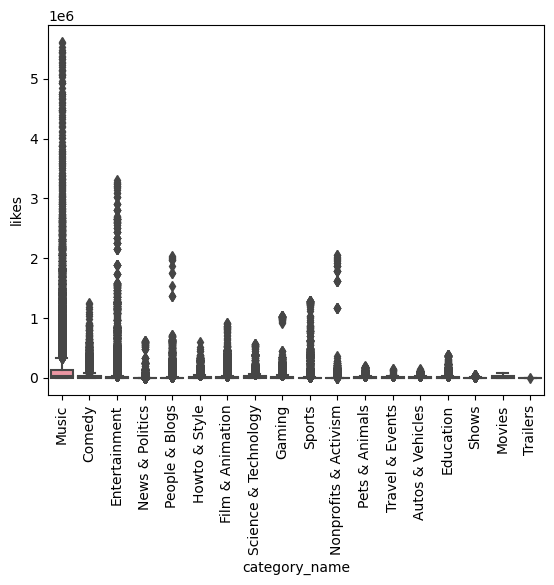

In [196]:
#rotate the x axis so that we can see the corresponding labels
#it's concluded that music was the most favorite on youtube
plt.xticks(rotation='vertical')
sns.boxplot(x='category_name', y='likes',data=df1)

<Axes: xlabel='views', ylabel='likes'>

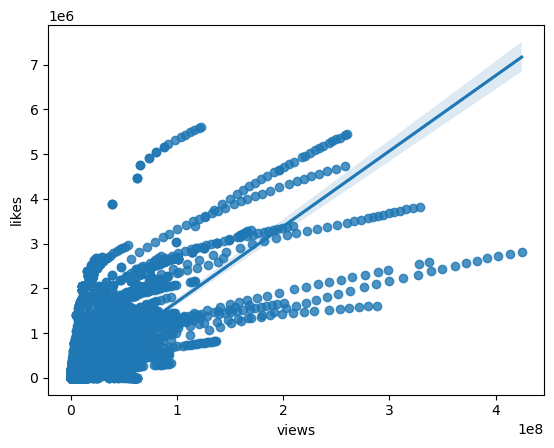

In [201]:
#scatter plot to show the correlation between likes and views
sns.regplot(x='views',y='likes', data = df1)

In [202]:
df1[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

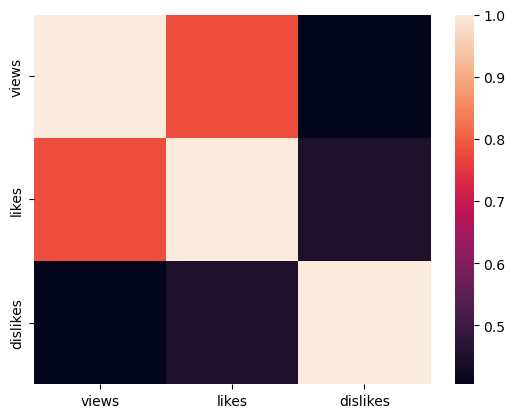

In [203]:
#use heat map to show the correlation among views, likes, and dislikes
sns.heatmap(df1[['views','likes','dislikes']].corr())

In [206]:
#analyze trening video on youtube
df1['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Daas                                    1
YT Industries                           1
BTLV Le mÃ©dia complÃ©mentaire          1
Quem Sabia ?                            1
Jessi Osorno                            1
Name: count, Length: 37824, dtype: int64

In [214]:
#this is to create data frame having same information as above
df2 = df1.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
df2 = df2.rename(columns={0:'num_videos'})
df2

,channel_title,num_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [215]:
import plotly.express as px

In [216]:
#create bar chart for the top 20 trending youtube channels
px.bar(data_frame=df2[0:20],x='channel_title', y='num_videos')

In [219]:
#does punctuation impact on likes, views, dislikes
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [220]:
#create function to count the number of punctuation
def punc_count(text):
    return len([i for i in text if i in string.punctuation])

In [226]:
df1['punc_count']=df1['title'].apply(punc_count)

C:\Users\khaph\AppData\Local\Temp\ipykernel_7504\250833454.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [227]:
df1['punc_count']

0         4
1         1
2         3
3         3
4         3
         ..
375936    0
375938    1
375939    3
375940    0
375941    1
Name: punc_count, Length: 339525, dtype: int64

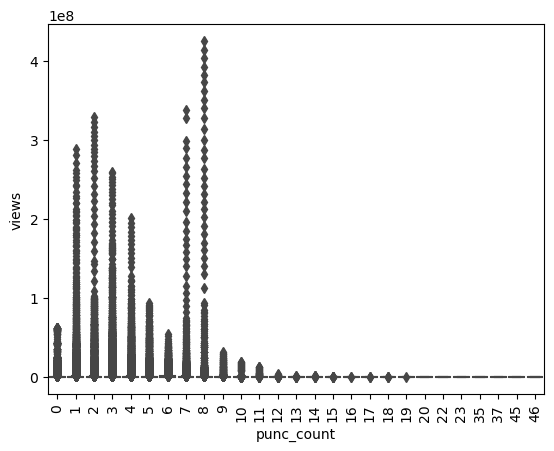

In [229]:
plt.xticks(rotation='vertical')
sns.boxplot(x='punc_count', y='views',data=df1)
plt.show()